<a href="https://colab.research.google.com/github/pszachew/Music-Genre-Classification/blob/master/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
X = pd.read_csv('/content/gdrive/MyDrive/csv_data/embedded.csv',header=None)

In [5]:
y = pd.read_csv('/content/gdrive/MyDrive/csv_data/labels.csv', header=None)

In [6]:
scaler = StandardScaler()
scaler.fit(X)
X_sc =pd.DataFrame(scaler.transform(X))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.3, random_state=10)

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg_mod = LogisticRegression(max_iter=10000)

In [ ]:
log_reg_mod.fit(X_train, np.array(y_train).flatten())

In [ ]:
joblib.dump(log_reg_mod, 'log_reg.sav')

['log_reg.sav']

In [ ]:
y_pre_lg = log_reg_mod.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pre_lg))

              precision    recall  f1-score   support

       blues       0.87      0.94      0.90        35
   classical       0.89      1.00      0.94        33
     country       0.81      0.78      0.79        27
       disco       0.88      0.68      0.77        34
      hiphop       0.77      0.96      0.85        24
        jazz       1.00      0.91      0.96        35
       metal       0.97      1.00      0.98        31
         pop       0.77      0.88      0.82        26
      reggae       0.92      0.80      0.86        30
        rock       0.70      0.64      0.67        25

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.87      0.86      0.86       300



In [ ]:
print(confusion_matrix(y_test, y_pre_lg))

[[33  1  0  0  0  0  0  0  0  1]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 2  0 21  2  0  0  0  1  0  1]
 [ 0  1  1 23  2  0  0  4  0  3]
 [ 0  0  0  0 23  0  0  0  1  0]
 [ 1  2  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 31  0  0  0]
 [ 0  0  0  0  2  0  0 23  0  1]
 [ 0  0  1  1  1  0  0  2 24  1]
 [ 2  0  3  0  2  0  1  0  1 16]]


In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)
mod_lg = LogisticRegression(max_iter=10000)

In [ ]:
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_lg.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_lg.predict(X_test))}")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.8618618618618619
Accuracy for the fold no. 2 on the test set: 0.8678678678678678
Accuracy for the fold no. 3 on the test set: 0.8318318318318318


## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 4)
neigh.fit(X_train, np.array(y_train).flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
acc_ls = []
for n in range (3,20):
  neigh = KNeighborsClassifier(n_neighbors = n)
  neigh.fit(X_train, np.array(y_train).flatten())
  acc_ls.append(accuracy_score(y_test, neigh.predict(X_test)))

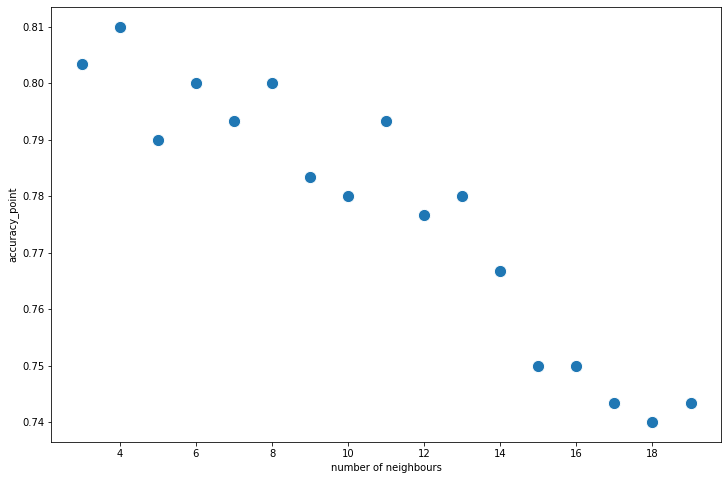

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=range(3,20), y=acc_ls, s=150)
plt.ylabel('accuracy_point')
plt.xlabel('number of neighbours')
plt.show()

In [ ]:
kf3 = KFold(n_splits=3, shuffle=True)
mod_knn = KNeighborsClassifier(n_neighbors=4)
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  mod_knn.fit(X_train, np.array(y_train).flatten())
  print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, mod_knn.predict(X_test))}")
  i=i+1

Accuracy for the fold no. 1 on the test set: 0.7717717717717718
Accuracy for the fold no. 2 on the test set: 0.7747747747747747
Accuracy for the fold no. 3 on the test set: 0.8078078078078078


### **SVM**

In [34]:
from sklearn.svm import SVC

In [66]:
kernels = {'linear':[], 'poly':[], 'rbf':[], 'sigmoid':[]}

In [67]:
kf3 = KFold(n_splits=3, shuffle=True)

In [68]:
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  for kernel in kernels.keys():
    mod_svm = SVC(kernel=kernel)
    mod_svm.fit(X_train, np.array(y_train).flatten())
    kernels[kernel].append(accuracy_score(y_test, mod_svm.predict(X_test)))
    print(f"Accuracy for the fold no. {i} withe kernel = {kernel} on the test set: {kernels[kernel][i-1]}")
  i=i+1
  print('')

Accuracy for the fold no. 1 withe kernel = linear on the test set: 0.8558558558558559
Accuracy for the fold no. 1 withe kernel = poly on the test set: 0.48348348348348347
Accuracy for the fold no. 1 withe kernel = rbf on the test set: 0.8108108108108109
Accuracy for the fold no. 1 withe kernel = sigmoid on the test set: 0.8228228228228228

Accuracy for the fold no. 2 withe kernel = linear on the test set: 0.8468468468468469
Accuracy for the fold no. 2 withe kernel = poly on the test set: 0.6516516516516516
Accuracy for the fold no. 2 withe kernel = rbf on the test set: 0.7957957957957958
Accuracy for the fold no. 2 withe kernel = sigmoid on the test set: 0.8048048048048048

Accuracy for the fold no. 3 withe kernel = linear on the test set: 0.8558558558558559
Accuracy for the fold no. 3 withe kernel = poly on the test set: 0.5135135135135135
Accuracy for the fold no. 3 withe kernel = rbf on the test set: 0.8138138138138138
Accuracy for the fold no. 3 withe kernel = sigmoid on the test s

In [74]:
acc_mean = []
for key in kernels.keys():
  acc_mean.append(mean(kernels[key]))

Text(0, 0.5, 'Accuracy Score mean value of 3 folds')

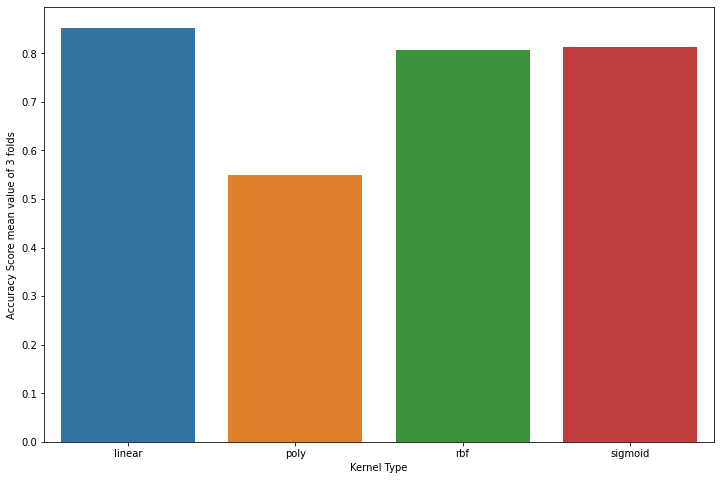

In [82]:
plt.figure(figsize=(12,8))
sns.barplot(x=list(kernels.keys()), y=acc_mean)
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy Score mean value of 3 folds')

### **Decision Tree**

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
clf = DecisionTreeClassifier(max_depth=20)

In [27]:
clf.fit(X_train, np.array(y_train).flatten())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
y_pred = clf.predict(X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.43666666666666665

In [32]:
kf3 = KFold(n_splits=3)

In [ ]:
acc_lst = []
i=1
for x_train_idx, x_test_idx in kf3.split(X_sc):
  X_train = X_sc.iloc[x_train_idx]
  X_test = X_sc.iloc[x_test_idx]
  y_train = y.iloc[x_train_idx]
  y_test = y.iloc[x_test_idx]
  for n in range (3,20):
